<a href="https://colab.research.google.com/github/NetoRibeiro/DATA8001Assignment1/blob/main/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing

In [199]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
from datetime import datetime as dt

import calendar
import re
import string

import math
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [200]:
df_processed = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/R00206995/data/R00206995_processed.csv')

In [201]:
df_processed.head()

,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,202-C-2315,2020-07-01,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0
1,191-C-3750,2019-01-20,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0
2,191-L-3155,2019-03-21,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0
3,191-D-2645,2019-01-26,2019,1,DUBLIN,AUDI,Q3,SUV,ORANGE,C,44836.0
4,181-W-341,2018-01-27,2018,1,WATERFORD,OPEL,ASTRA,HATCHBACK,RED,A,32188.0


##Data Visualisation - 10%

In [ ]:
df_processed['purchase_date']

0       2020-07-01
1       2019-01-20
2       2019-03-21
3       2019-01-26
4       2018-01-27
           ...    
3795    2018-04-19
3796    2019-01-10
3797    2020-01-27
3798    2019-03-24
3799    2019-07-05
Name: purchase_date, Length: 3800, dtype: object

In [ ]:
df_processed.head()

,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,202-C-2315,2020-07-01,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0
1,191-C-3750,2019-01-20,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0
2,191-L-3155,2019-03-21,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0
3,191-D-2645,2019-01-26,2019,1,DUBLIN,AUDI,Q3,SUV,ORANGE,C,44836.0
4,181-W-341,2018-01-27,2018,1,WATERFORD,OPEL,ASTRA,HATCHBACK,RED,A,32188.0


##Data Modelling - 10%

In [ ]:
df_processed.head()

,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,202-C-2315,2020-07-01,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0
1,191-C-3750,2019-01-20,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0
2,191-L-3155,2019-03-21,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0
3,191-D-2645,2019-01-26,2019,1,DUBLIN,AUDI,Q3,SUV,ORANGE,C,44836.0
4,181-W-341,2018-01-27,2018,1,WATERFORD,OPEL,ASTRA,HATCHBACK,RED,A,32188.0


###Linear Model
#### x ==> year and month
#### y ==> price

In [4]:
# Split data set into Train and Test
X = df_processed[['year', 'month']]
y = df_processed['price']

# NOTE: the random_state=0, i.e., 0 is the random number generator, if you said random_state=None, it would generate a different random set every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8001)

In [5]:
X_train.shape, X_test.shape

((3040, 2), (760, 2))

In [6]:
# create linear regression object from sklean LinearRegression library
lr_model_1 = LinearRegression()

In [7]:
# fit the model on the training data
lr_model_1 = lr_model_1.fit(X=X_train, y=y_train)

In [8]:
# generate predictions and compare to the test set
lr_model_predict = lr_model_1.predict(X_test)

In [9]:
# use sklearn.metrics.mean_squared_error, sklearn.metrics.r2_score metrics
lr_model_mse = mean_squared_error(y_pred=lr_model_predict, y_true=y_test)
lr_model_r_sq = r2_score(y_pred=lr_model_predict, y_true=y_test)

###Valitation Test:: Linear Regressor Model (Year and Month)

In [10]:
print(f'Linear Model Year and Month Accuracy:\nRMSE={math.sqrt(lr_model_mse):,.0f}\nRSq={lr_model_r_sq:.4f} or {lr_model_r_sq*100:.4f}% of the variability in Y can be explained using X')

Linear Model Year and Month Accuracy:
RMSE=29,880
RSq=-0.0022 or -0.2157% of the variability in Y can be explained using X


###Transform features and split into test and training

In [12]:
df_processed.head()

,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,202-C-2315,2020-07-01,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0
1,191-C-3750,2019-01-20,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0
2,191-L-3155,2019-03-21,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0
3,191-D-2645,2019-01-26,2019,1,DUBLIN,AUDI,Q3,SUV,ORANGE,C,44836.0
4,181-W-341,2018-01-27,2018,1,WATERFORD,OPEL,ASTRA,HATCHBACK,RED,A,32188.0


In [13]:
# Create a list of columns to apply Dummies
list_columns_to_dumies = ['county', 'type', 'tax_band']

In [14]:
# Create a new Data Frame to apply dummies
df_dummies = df_processed[list_columns_to_dumies].copy()

In [15]:
# Apply Lower case before dummies
df_dummies['county'] = df_dummies['county'].str.lower()
df_dummies['type'] = df_dummies['type'].str.lower()
df_dummies['tax_band'] = df_dummies['tax_band'].str.lower()

In [16]:
# Apply Dammies
df_dummies = pd.get_dummies(df_dummies, columns=list_columns_to_dumies)

In [17]:
df_dummies.dtypes

county_cork         uint8
county_dublin       uint8
county_galway       uint8
county_limerick     uint8
county_waterford    uint8
type_coupe          uint8
type_estate         uint8
type_hatchback      uint8
type_saloon         uint8
type_suv            uint8
tax_band_a          uint8
tax_band_b          uint8
tax_band_c          uint8
tax_band_d          uint8
tax_band_e          uint8
dtype: object

In [18]:
df_dummies = df_processed.join(df_dummies)

In [19]:
df_dummies.drop(['car_reg', 'purchase_date'], axis=1, inplace=True)

In [20]:
df_dummies.head(3)

,year,month,county,make,model,type,colour,tax_band,price,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
0,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


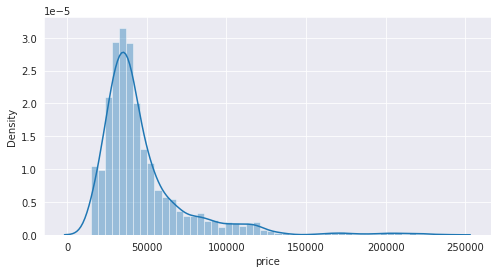

In [21]:
# Plot Price distribution
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.distplot(df_dummies.price)

In [22]:
# Find correlation with the price
output_feature_dummies = 'price'
correlations = df_dummies.corr()
correlations[output_feature_dummies]

year                0.039399
month               0.020092
price               1.000000
county_cork        -0.023750
county_dublin       0.012927
county_galway      -0.005611
county_limerick     0.003292
county_waterford    0.013538
type_coupe          0.156278
type_estate         0.077543
type_hatchback     -0.275561
type_saloon         0.107899
type_suv            0.064070
tax_band_a         -0.330822
tax_band_b         -0.139552
tax_band_c          0.162498
tax_band_d          0.482691
tax_band_e          0.320714
Name: price, dtype: float64

In [23]:
list_columns = df_dummies.columns

In [24]:
# Split data into 20% test and 80% train
df_dummies_train, df_dummies_test = train_test_split(df_dummies.copy() ,test_size=0.2, random_state=8001)

In [25]:
def get_feature_stats(df, list_columns):
    lis_of_string_features = []
    for feature in list_columns:
      if df[feature].dtype not in ['uint8', 'int16','int32','int64','float16','float32','float64']:
        lis_of_string_features.append(feature)
    return lis_of_string_features

In [26]:
list_feature = get_feature_stats(df_dummies, list_columns)

In [27]:
#Convert all string features to a int features
for feature in list_feature:
  label_condition = LabelEncoder()
  df_dummies_train[feature] = label_condition.fit_transform(df_dummies_train[feature])
  df_dummies_test[feature] = label_condition.fit_transform(df_dummies_test[feature])

In [28]:
df_dummies_train.shape, df_dummies_test.shape

((3040, 24), (760, 24))

In [29]:
df_dummies_train.head(3)

,year,month,county,make,model,type,colour,tax_band,price,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
654,2018,3,1,3,14,4,4,2,41920.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1947,2018,2,4,2,21,4,4,1,34961.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3698,2020,7,1,1,1,3,0,1,69784.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


###Linear Regression Model

In [71]:
# X variables (independent)
input_features_dummies = [item for item in df_dummies.columns if item not in output_feature_dummies]
print(input_features_dummies)

['year', 'month', 'county', 'make', 'model', 'type', 'colour', 'tax_band', 'county_cork', 'county_dublin', 'county_galway', 'county_limerick', 'county_waterford', 'type_coupe', 'type_estate', 'type_hatchback', 'type_saloon', 'type_suv', 'tax_band_a', 'tax_band_b', 'tax_band_c', 'tax_band_d', 'tax_band_e']


In [72]:
# create a linear regression model
linear_model = LinearRegression()

In [73]:
# Training the Model
first_model = linear_model.fit(X=df_dummies_train[input_features_dummies], y=df_dummies_train[output_feature_dummies])

In [74]:
# Forescat the Price for test
price_predicted = first_model.predict(X=df_dummies_test[input_features_dummies])

In [75]:
price_predicted[0:10]

array([35322.64493742, 35641.10725982, 33746.05843528, 46971.78466263,
       34617.70199626, 53817.23156391, 33654.1762854 , 39708.81502702,
       42654.09127364, 54395.54785705])

In [76]:
# Get mean of the squared error
first_model_mse = mean_squared_error(y_pred=price_predicted, y_true=df_dummies_test[output_feature_dummies])
first_model_r2_score = r2_score(y_pred=price_predicted, y_true=df_dummies_test[output_feature_dummies])

###Validation Test:: Linear Regressor Model

In [77]:
print(f'Linear Regressor Model Accuracy:\nRMSE={math.sqrt(first_model_mse):,.0f}\nRSq={first_model_r2_score:.4f} ==> {first_model_r2_score*100:.4f}% of the variability in Y can be explained using X')

Linear Regressor Model Accuracy:
RMSE=20,574
RSq=0.5249 ==> 52.4869% of the variability in Y can be explained using X


###Linear Regression Model Standar Scaler features

In [132]:
# Find correlation with the price
output_feature_dummies = 'price'
list_columns_to_dumies.append(output_feature_dummies)
correlations = df_dummies.corr()
correlations[output_feature_dummies]

year                0.039399
month               0.020092
price               1.000000
county_cork        -0.023750
county_dublin       0.012927
county_galway      -0.005611
county_limerick     0.003292
county_waterford    0.013538
type_coupe          0.156278
type_estate         0.077543
type_hatchback     -0.275561
type_saloon         0.107899
type_suv            0.064070
tax_band_a         -0.330822
tax_band_b         -0.139552
tax_band_c          0.162498
tax_band_d          0.482691
tax_band_e          0.320714
Name: price, dtype: float64

In [133]:
df_dummies.head(3)

,year,month,county,make,model,type,colour,tax_band,price,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
0,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [134]:
df_scaler_train = df_dummies_train.copy()
df_scaler_test = df_dummies_test.copy()

In [135]:
# X variables (independent)
input_features_dummies = [item for item in df_scaler_train.columns if item not in output_feature_dummies]
print(input_features_dummies)

['year', 'month', 'county', 'make', 'model', 'type', 'colour', 'tax_band', 'county_cork', 'county_dublin', 'county_galway', 'county_limerick', 'county_waterford', 'type_coupe', 'type_estate', 'type_hatchback', 'type_saloon', 'type_suv', 'tax_band_a', 'tax_band_b', 'tax_band_c', 'tax_band_d', 'tax_band_e']


In [136]:
# Apply Standar Scaler for each column
for column in df_dummies_train.columns:

  if column == output_feature_dummies:
    print(f'skip:\t{column}')

  else:
    # print(f'StandarScaler for:\t{column}')
    scaler_column = StandardScaler()
    scaler_column.fit(df_scaler_train[column].values.reshape(-1, 1))
    df_scaler_train[column] = scaler_column.transform(df_scaler_train[column].values.reshape(-1, 1))
    df_scaler_test[column] = scaler_column.transform(df_scaler_test[column].values.reshape(-1, 1))

skip:	price


In [137]:
X_train = df_scaler_train[input_features_dummies].values
X_test = df_scaler_test[input_features_dummies].values

y_train = df_scaler_train[[output_feature_dummies]].values
y_test = df_scaler_test[[output_feature_dummies]].values

In [138]:
lr_scaler_model = LinearRegression()

In [139]:
lr_scaler_model_trained = lr_scaler_model.fit(X=X_train, y=y_train)

In [140]:
lr_scaler_model_prodict = lr_scaler_model_trained.predict(X=X_test)

In [141]:
lr_scaler_model_mse = mean_squared_error(y_pred=lr_scaler_model_prodict, y_true=y_test)
lr_scaler_model_r_sq = r2_score(y_pred=lr_scaler_model_prodict, y_true=y_test)

In [142]:
df_features_slopes_sca = pd.DataFrame(lr_scaler_model_trained.coef_.flatten(), input_features_dummies, columns=['slopes']).reset_index().rename(columns={'index':'feature1'})
df_features_slopes_sca


,feature1,slopes
0,year,6.182222e+02
1,month,2.612397e+02
2,county,6.955881e+16
3,make,-2.448941e+03
4,model,-5.474909e+03
5,type,-1.590542e+16
6,colour,-4.214610e+02
7,tax_band,-5.295968e+16
8,county_cork,3.406657e+15
9,county_dublin,-2.359792e+16


###Valitation Test:: Linear Regressor Model Standar Scaler Features

In [143]:
print(f'Linear Model StandardScaler Features Accuracy:\nRMSE={math.sqrt(lr_scaler_model_mse):,.0f}\nRSq={lr_scaler_model_r_sq:.4f} or {lr_scaler_model_r_sq*100:.4f}% of the variability in Y can be explained using X')

Linear Model StandardScaler Features Accuracy:
RMSE=20,554
RSq=0.5258 or 52.5768% of the variability in Y can be explained using X


###Decision Tree Regressor Model

In [ ]:
dec_tree_model = DecisionTreeRegressor()

In [ ]:
second_model = dec_tree_model.fit(X=df_dummies_train[input_features_dummies], y=df_dummies_train[output_feature_dummies])

In [ ]:
second_model_price = dec_tree_model.predict(X=df_dummies_test[input_features_dummies])

In [ ]:
# Get mean of the squared error
second_model_mse = mean_squared_error(y_pred=second_model_price, y_true=df_dummies_test[output_feature_dummies])
second_model_r2_score = r2_score(y_pred=second_model_price, y_true=df_dummies_test[output_feature_dummies])

###Validation Test:: Decision Tree Regressor Model

In [ ]:
print(f'Decision Tree Model Accuracy:\nRMSE={math.sqrt(second_model_mse):,.0f}\nRSq={second_model_r2_score:.2f} ==> {second_model_r2_score*100:.0f}% of the variability in Y can be explained using X')

Decision Tree Model Accuracy:
RMSE=16,485
RSq=0.69 ==> 69% of the variability in Y can be explained using X


###Random Forest Model

In [1]:
random_forest_model = RandomForestRegressor()

NameError: ignored

In [2]:
third_model = random_forest_model.fit(X=df_dummies_train[input_features_dummies], y=df_dummies_train[output_feature_dummies])

NameError: ignored

In [ ]:
third_model_price = random_forest_model.predict(X=df_dummies_test[input_features_dummies])

In [ ]:
# Get mean of the squared error
third_model_mse = mean_squared_error(y_pred=third_model_price, y_true=df_dummies_test[output_feature_dummies])
third_model_r2_score = r2_score(y_pred=third_model_price, y_true=df_dummies_test[output_feature_dummies])

###Validation Test:: Random Forest Model

In [ ]:
print(f'Random Forest Model Accuracy:\nRMSE={math.sqrt(third_model_mse):,.0f}\nRSq={third_model_r2_score:.2f} ==> {third_model_r2_score*100:.0f}% of the variability in Y can be explained using X')

Random Forest Model Accuracy:
RMSE=12,071
RSq=0.84 ==> 84% of the variability in Y can be explained using X


###Start using Grid Search to get Best Stimator

In [ ]:
parameters = {'min_samples_leaf':[1,10], 'min_samples_split':[2,10], 'n_estimators':[100,250,500,750]}

In [ ]:
rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, parameters)

In [ ]:
grid_search.fit(X=df_dummies_train[input_features_dummies], y=df_dummies_train[output_feature_dummies])

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
random_forest_best_model = grid_search.best_estimator_

In [ ]:
fourth_model_price = random_forest_best_model.predict(X=df_dummies_test[input_features_dummies])

In [ ]:
fourth_model_mse = mean_squared_error(y_pred=fourth_model_price, y_true=df_dummies_test[output_feature_dummies])
fourth_model_r2_score = r2_score(y_pred=fourth_model_price, y_true=df_dummies_test[output_feature_dummies])

###Validation Test:: Random Forest Best Estimator Model

In [ ]:
print(f'Random Forest Model Accuracy:\nRMSE={math.sqrt(fourth_model_mse):,.0f}\nRSq={fourth_model_r2_score:.2f} ==> {fourth_model_r2_score*100:.0f}% of the variability in Y can be explained using X')

Random Forest Model Accuracy:
RMSE=11,290
RSq=0.86 ==> 86% of the variability in Y can be explained using X


###Lienar Regression Model MinMaxScaler

In [144]:
df_dummies_train.columns

Index(['year', 'month', 'county', 'make', 'model', 'type', 'colour',
       'tax_band', 'price', 'county_cork', 'county_dublin', 'county_galway',
       'county_limerick', 'county_waterford', 'type_coupe', 'type_estate',
       'type_hatchback', 'type_saloon', 'type_suv', 'tax_band_a', 'tax_band_b',
       'tax_band_c', 'tax_band_d', 'tax_band_e'],
      dtype='object')

In [159]:
df_mms_train = df_dummies_train.copy()
df_mms_test = df_dummies_test.copy()

In [161]:
# Apply Standar Scaler for each column
for column in df_dummies_train.columns:

  if column == output_feature_dummies:
    print(f'skip:\t{column}')

  else:
    # print(f'StandarScaler for:\t{column}')
    mms_column = MinMaxScaler()
    mms_column.fit(df_mms_train[column].values.reshape(-1,1))
    df_mms_train[column] = mms_column.transform(df_mms_train[column].values.reshape(-1,1))
    df_mms_test[column] = mms_column.transform(df_mms_test[column].values.reshape(-1,1))

skip:	price


In [163]:
X_mms_train = df_mms_train[input_features_dummies].values
X_mms_test = df_mms_test[input_features_dummies].values

y_mms_train = df_mms_train[[output_feature_dummies]].values
y_mms_test = df_mms_test[[output_feature_dummies]].values

In [164]:
lr_mms_model = LinearRegression()

In [166]:
lr_mms_model_trained = lr_mms_model.fit(X=X_mms_train, y=y_mms_train)

In [167]:
lr_mms_model_prodict = lr_mms_model_trained.predict(X=X_mms_test)

In [168]:
lr_mms_model_mse = mean_squared_error(y_pred=lr_mms_model_prodict, y_true=y_mms_test)
lr_mms_model_r_sq = r2_score(y_pred=lr_mms_model_prodict, y_true=y_mms_test)

In [169]:
df_features_slopes_mms = pd.DataFrame(lr_mms_model_trained.coef_.flatten(), input_features_dummies, columns=['slopes']).reset_index().rename(columns={'index':'feature1'})
df_features_slopes_mms

,feature1,slopes
0,year,1.545870e+03
1,month,1.121400e+03
2,county,4.272801e+17
3,make,-7.045365e+03
4,model,-1.963418e+04
5,type,-1.201159e+17
6,colour,-7.029385e+02
7,tax_band,6.299969e+16
8,county_cork,-8.502250e+16
9,county_dublin,-1.918425e+17


###Valitation Test:: Linear Regressor Model Min Max Scaler Features

In [170]:
print(f'Linear Model StandardScaler Features Accuracy:\nRMSE={math.sqrt(lr_mms_model_mse):,.0f}\nRSq={lr_mms_model_r_sq:.4f} or {lr_mms_model_r_sq*100:.4f}% of the variability in Y can be explained using X')

Linear Model StandardScaler Features Accuracy:
RMSE=20,509
RSq=0.5279 or 52.7870% of the variability in Y can be explained using X


###Test

In [171]:
df_dummies.head(3)

,year,month,county,make,model,type,colour,tax_band,price,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
0,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [185]:
df_dummies_train.columns

Index(['year', 'month', 'county', 'make', 'model', 'type', 'colour',
       'tax_band', 'price', 'county_cork', 'county_dublin', 'county_galway',
       'county_limerick', 'county_waterford', 'type_coupe', 'type_estate',
       'type_hatchback', 'type_saloon', 'type_suv', 'tax_band_a', 'tax_band_b',
       'tax_band_c', 'tax_band_d', 'tax_band_e'],
      dtype='object')

In [186]:
df_lr_m3_train = df_dummies_train[
                                  ['year', 'month', 'make', 'model', 'colour',
                                   'price', 'county_cork', 'county_dublin',
                                   'county_galway', 'county_limerick',
                                   'county_waterford', 'type_coupe',
                                   'type_estate', 'type_hatchback',
                                   'type_saloon', 'type_suv', 'tax_band_a',
                                   'tax_band_b', 'tax_band_c', 'tax_band_d',
                                   'tax_band_e']
                                  ].copy()

In [187]:
df_lr_m3_test = df_dummies_test[
                                  ['year', 'month', 'make', 'model', 'colour',
                                   'price', 'county_cork', 'county_dublin',
                                   'county_galway', 'county_limerick',
                                   'county_waterford', 'type_coupe',
                                   'type_estate', 'type_hatchback',
                                   'type_saloon', 'type_suv', 'tax_band_a',
                                   'tax_band_b', 'tax_band_c', 'tax_band_d',
                                   'tax_band_e']
                                  ].copy()

In [196]:
df_lr_m3_train

,year,month,make,model,colour,price,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
654,2018,3,3,14,4,41920.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1947,2018,2,2,21,4,34961.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3698,2020,7,1,1,0,69784.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [188]:
input_features_m3 = df_lr_m3_train.columns.drop('price')

In [191]:
X_m3_train = df_lr_m3_train[input_features_m3].values
X_m3_test = df_lr_m3_test[input_features_m3].values

y_m3_train = df_lr_m3_train[[output_feature_dummies]].values
y_m3_test = df_lr_m3_test[[output_feature_dummies]].values

In [193]:
lr_m3_model = LinearRegression()

lr_m3_model_trained = lr_m3_model.fit(X=X_m3_train, y=y_m3_train)

lr_m3_model_prodict = lr_m3_model_trained.predict(X=X_m3_test)

lr_m3_model_mse = mean_squared_error(y_pred=lr_m3_model_prodict, y_true=y_m3_test)
lr_m3_model_r_sq = r2_score(y_pred=lr_m3_model_prodict, y_true=y_m3_test)

###Validation Test:: Linear Regression Modelo M3

In [195]:
print(f'Linear Model M3 Features Accuracy:\nRMSE={math.sqrt(lr_m3_model_mse):,.0f}\nRSq={lr_m3_model_r_sq:.4f} or {lr_m3_model_r_sq*100:.4f}% of the variability in Y can be explained using X')

Linear Model M3 Features Accuracy:
RMSE=20,574
RSq=0.5249 or 52.4869% of the variability in Y can be explained using X


###Linear Regression Model ==> Feature to Dummies
####['make', 'model', 'county', 'type', 'tax_band']

In [202]:
df_processed.columns

Index(['car_reg', 'purchase_date', 'year', 'month', 'county', 'make', 'model',
       'type', 'colour', 'tax_band', 'price'],
      dtype='object')

In [204]:
# Create a list of columns to apply Dummies
list_columns_to_dumies_2 = ['make', 'model', 'county', 'type', 'tax_band']

# Create a new Data Frame to apply dummies
df_dummies_2 = df_processed[list_columns_to_dumies_2].copy()

# Apply Lower case before dummies
df_dummies_2['county'] = df_dummies_2['county'].str.lower()
df_dummies_2['type'] = df_dummies_2['type'].str.lower()
df_dummies_2['tax_band'] = df_dummies_2['tax_band'].str.lower()
df_dummies_2['make'] = df_dummies_2['make'].str.lower()
df_dummies_2['model'] = df_dummies_2['model'].str.lower()

# Apply Dammies
df_dummies_2 = pd.get_dummies(df_dummies_2, columns=list_columns_to_dumies_2)
df_dummies_2.head(3)

,make_audi,make_bmw,make_ford,make_mazda,make_mercedes,make_opel,make_toyota,model_2 series,model_3 series,model_5 series,model_7 series,model_a-class,model_a4,model_a6,model_amg-gt,model_astra,model_c-class,model_camery,model_corolla,model_corsa,model_crossland x,model_cx-30,model_cx-5,model_fiesta,model_focus,model_glc-class,model_grandland x,model_insignia,model_kuga,model_mazda3,model_mazda6,model_mondeo,model_mustang,model_prius,model_q3,model_q7,model_rav4,model_x3,model_yaris,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [205]:
df_dummies_2 = df_processed.join(df_dummies_2)
df_dummies_2.drop(['car_reg', 'purchase_date', 'make', 'model', 'county', 'type', 'tax_band'], axis=1, inplace=True)

In [206]:
df_dummies_2.head(3)

,year,month,colour,price,make_audi,make_bmw,make_ford,make_mazda,make_mercedes,make_opel,make_toyota,model_2 series,model_3 series,model_5 series,model_7 series,model_a-class,model_a4,model_a6,model_amg-gt,model_astra,model_c-class,model_camery,model_corolla,model_corsa,model_crossland x,model_cx-30,model_cx-5,model_fiesta,model_focus,model_glc-class,model_grandland x,model_insignia,model_kuga,model_mazda3,model_mazda6,model_mondeo,model_mustang,model_prius,model_q3,model_q7,model_rav4,model_x3,model_yaris,county_cork,county_dublin,county_galway,county_limerick,county_waterford,type_coupe,type_estate,type_hatchback,type_saloon,type_suv,tax_band_a,tax_band_b,tax_band_c,tax_band_d,tax_band_e
0,2020,7,RED,55287.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,2019,1,SILVER,41690.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,2019,3,WHITE,40381.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [210]:
list_columns_d2 = df_dummies_2.columns

# Split data into 20% test and 80% train
df_dummies_2_train, df_dummies_2_test = train_test_split(df_dummies_2.copy() ,test_size=0.2, random_state=8001)

list_feature_2 = get_feature_stats(df_dummies_2, list_columns_d2)

In [212]:
#Convert all string features to a int features
for feature in list_feature_2:
  label_condition = LabelEncoder()
  df_dummies_2_train[feature] = label_condition.fit_transform(df_dummies_2_train[feature])
  df_dummies_2_test[feature] = label_condition.fit_transform(df_dummies_2_test[feature])

In [213]:
# X variables (independent)
input_features_dummies_2 = [item for item in df_dummies_2.columns if item not in output_feature_dummies]
print(input_features_dummies_2)

['year', 'month', 'colour', 'make_audi', 'make_bmw', 'make_ford', 'make_mazda', 'make_mercedes', 'make_opel', 'make_toyota', 'model_2 series', 'model_3 series', 'model_5 series', 'model_7 series', 'model_a-class', 'model_a4', 'model_a6', 'model_amg-gt', 'model_astra', 'model_c-class', 'model_camery', 'model_corolla', 'model_corsa', 'model_crossland x', 'model_cx-30', 'model_cx-5', 'model_fiesta', 'model_focus', 'model_glc-class', 'model_grandland x', 'model_insignia', 'model_kuga', 'model_mazda3', 'model_mazda6', 'model_mondeo', 'model_mustang', 'model_prius', 'model_q3', 'model_q7', 'model_rav4', 'model_x3', 'model_yaris', 'county_cork', 'county_dublin', 'county_galway', 'county_limerick', 'county_waterford', 'type_coupe', 'type_estate', 'type_hatchback', 'type_saloon', 'type_suv', 'tax_band_a', 'tax_band_b', 'tax_band_c', 'tax_band_d', 'tax_band_e']


In [215]:
X_dummies_2_train = df_dummies_2_train[input_features_dummies_2].values
X_dummies_2_test = df_dummies_2_test[input_features_dummies_2].values

y_dummies_2_train = df_dummies_2_train[[output_feature_dummies]].values
y_dummies_2_test = df_dummies_2_test[[output_feature_dummies]].values

In [216]:
lr_dummies_2_model = LinearRegression()

lr_dummies_2_model_trained = lr_dummies_2_model.fit(X=X_dummies_2_train, y=y_dummies_2_train)

lr_dummies_2_model_prodict = lr_dummies_2_model_trained.predict(X=X_dummies_2_test)

lr_dummies_2_model_mse = mean_squared_error(y_pred=lr_dummies_2_model_prodict, y_true=y_dummies_2_test)
lr_dummies_2_model_r_sq = r2_score(y_pred=lr_dummies_2_model_prodict, y_true=y_dummies_2_test)

###Validation Test:: Linear Regression Model Dummies 2

In [218]:
print(f'Linear Model Dummies 2 Features Accuracy:\nRMSE={math.sqrt(lr_dummies_2_model_mse):,.0f}\nRSq={lr_dummies_2_model_r_sq:.2f} or {lr_dummies_2_model_r_sq*100:.0f}% of the variability in Y can be explained using X')

Linear Model Dummies 2 Features Accuracy:
RMSE=10,629
RSq=0.87 or 87% of the variability in Y can be explained using X
